In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Titanic_dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Titanic Veri Seti Sütunları

- **survival**: Hayatta Kalma Durumu (0 = Hayır, 1 = Evet)
- **pclass**: Bilet Sınıfı (1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf)
- **sex**: Cinsiyet
- **age**: Yaş (yıl cinsinden)
- **sibsp**: Gemideki kardeş veya eş sayısı
- **parch**: Gemideki ebeveyn veya çocuk sayısı
- **ticket**: Bilet numarası
- **fare**: Ödenen ücret
- **cabin**: Kamara numarası
- **embarked**: Biniş Limanı (C = Cherbourg, Q = Queenstown, S = Southampton)

### 1. KAZADA ÖLENLERİN YAŞ ORTALAMASINI BULUNUZ

##### survival kısmındaki 0 olan satırları seçip ve bunların age sütunundaki ortalamasını alacağım

In [9]:
dead_age_mean = df[df["Survived"] == 0]["Age"].mean()

In [10]:
dead_age_mean

30.62617924528302

### 2. KAZADA ÖLENLERİN BİLET FİYAT ORTALAMASINI VE MEDYANINI BULUNUZ

In [13]:
dead_fare_mean = df[df["Survived"]==0]["Fare"].mean()
dead_fare_mean

22.117886885245902

In [15]:
dead_fare_median = df[df["Survived"]==0]["Fare"].median()
dead_fare_median

10.5

### 3. KAZADA ÖLEN ERKEKLERİN YAŞ ORTALAMASINI BULUNUZ

In [17]:
dead_male_age_mean = df[(df["Survived"] == 0) & (df["Sex"] == "male")]["Age"].mean()
dead_male_age_mean

31.618055555555557

### 4. KAZADA ÖLEN KADINLARIN YAŞ ORTALAMASINI BULUNUZ

In [18]:
dead_female_age_mean = df[(df["Survived"] == 0) & (df["Sex"] == "female")]["Age"].mean()
dead_female_age_mean

25.046875

### 5. KAZADAN KURTULANLARIN YAŞ ORTALAMASINI BULUNUZ

In [19]:
live_age_mean = df[df["Survived"] == 1]["Age"].mean()
live_age_mean

28.343689655172415

### 6. KAZADAN KURTULANLARIN BİLET FİYATLARININ ORTLAMASINI BULUNUZ

In [20]:
live_fare_mean = df[df["Survived"]==1]["Fare"].mean()
live_fare_mean

48.39540760233918

### 7. KAZADAN KURTULAN TOPLAM KİŞİ SAYISINI BULUNUZ

In [23]:
live = df[df["Survived"]==1].shape[0]
live

342

In [25]:
len(df[(df.Survived==1)]) #2. yol

342

### 8. 10 YAŞINDAN KÜÇÜKLERİN BİLET FİYATLARININ MEDYAN DEĞERİNİ BULUNUZ

In [27]:
child_fare_median = df[df["Age"] < 10]["Fare"].median()
child_fare_median

27.0

### 9. 1.SINIF, 2.SINIF ve 3.SINIF BİLET FİYATLARININ ORTALAMA ve MEDYANLARINI KARŞILAŞTIRINIZ. 

In [28]:
first_class_mean = df[df["Pclass"] == 1]["Fare"].mean()
first_class_median = df[df["Pclass"] == 1]["Fare"].median()

In [31]:
second_class_mean = df[df["Pclass"] == 2]["Fare"].mean()
second_class_median = df[df["Pclass"] == 2]["Fare"].median()

In [32]:
third_class_mean = df[df["Pclass"] == 3]["Fare"].mean()
third_class_median =  df[df["Pclass"] == 3]["Fare"].median()

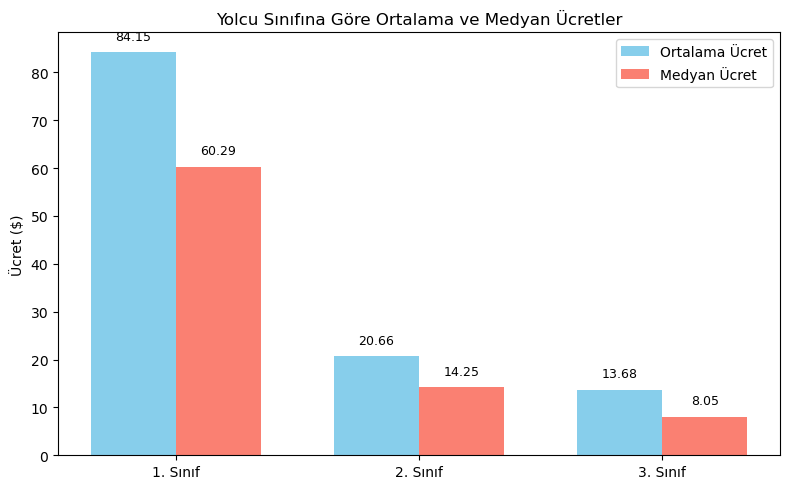

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sınıf adları
classes = ['1. Sınıf', '2. Sınıf', '3. Sınıf']

# Ortalama ve medyan değerler
means = [first_class_mean, second_class_mean, third_class_mean]
medians = [first_class_median, second_class_median, third_class_median]

# Bar genişliği ve pozisyonları
x = np.arange(len(classes))
width = 0.35  # Bar kalınlığı

# Grafik oluştur
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, means, width, label='Ortalama Ücret', color='skyblue')
bars2 = ax.bar(x + width/2, medians, width, label='Medyan Ücret', color='salmon')

# Başlık ve etiketler
ax.set_ylabel('Ücret ($)')
ax.set_title('Yolcu Sınıfına Göre Ortalama ve Medyan Ücretler')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Üzerlerine değer yazmak (isteğe bağlı)
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 10. KAZADA ÖLEN KADINLARIN ORANI İLE ERKEKLERİN ORANINI KARŞILAŞTIRINIZ

In [40]:
dead_male = len(df[(df["Survived"]==0) & (df["Sex"] == "male")]) / len(df[(df["Survived"]==1) & (df["Sex"] == "male")])
dead_male

4.293577981651376

In [41]:
dead_female = len(df[(df["Survived"]==0) & (df["Sex"] == "female")]) / len(df[(df["Survived"]==1) & (df["Sex"] == "female")])
dead_female

0.34763948497854075

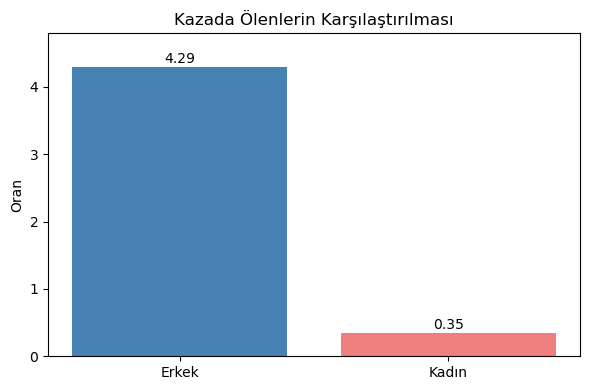

In [43]:
import matplotlib.pyplot as plt

# Etiketler ve değerler
labels = ['Erkek', 'Kadın']
values = [dead_male, dead_female]

# Grafik
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['steelblue', 'lightcoral'])

# Yüzde yazıları
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

# Başlık ve eksen
plt.title("Kazada Ölenlerin Karşılaştırılması")
plt.ylabel("Oran")
plt.ylim(0, max(values) + 0.5)

plt.tight_layout()
plt.show()